In [1]:
from imports import *

2023-02-16 13:42:42.089871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 13:42:42.812200: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-16 13:42:44.232045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/siddharth/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-16 13:42:44.232221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugi

Using tensorflow's CNN and opencv to classify images
Steps of implimenting it as follows :
Load the data from disk or get the live feed from the camera
Find the face in the image
Crop the face from the image
Resize the image and feed it to the CNN
Get the output from the CNN
Match the output with the labels and display the name of the person


In [ ]:
# creating a function which will be used to create a model for image classification which loads the data, trains the model and then predicts the output
# the class will be used to create a model for image classification

class ImageClassifier:
    # path can be either path to folder or inbuilt dataset
    def __init__(self, path=None):
        self.path = path
        self.data = self.imagegathering()
        self.model = self.createmodel()
        self.model.fit(self.data)
        self.model.predict(self.data)
        
    
    def imagegathering(self):
        if self.path is not None:
            data = []
            for i in os.listdir(self.path):
                data.append(i)
            return data
        else:
            lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.4)
            self.faces = lfw_people.data
            self.labels = lfw_people.target
            print(self.faces.shape)
            return self.faces


    # creating a function which will be used to create a model for image classification
    def createmodel(self):
        model = tf.keras.models.Sequential()
        base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_shape=(64, 64, 3), trainable=False)
        model.add(base_model)
        model.add(tf.keras.layers.GlobalAveragePooling2D())
        model.add(tf.keras.layers.Dense(1024, activation='relu'))
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(len(np.unique(self.labels)), activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model


# creating an object of the class ImageClassifier
imageclassifier = ImageClassifier(path = None)


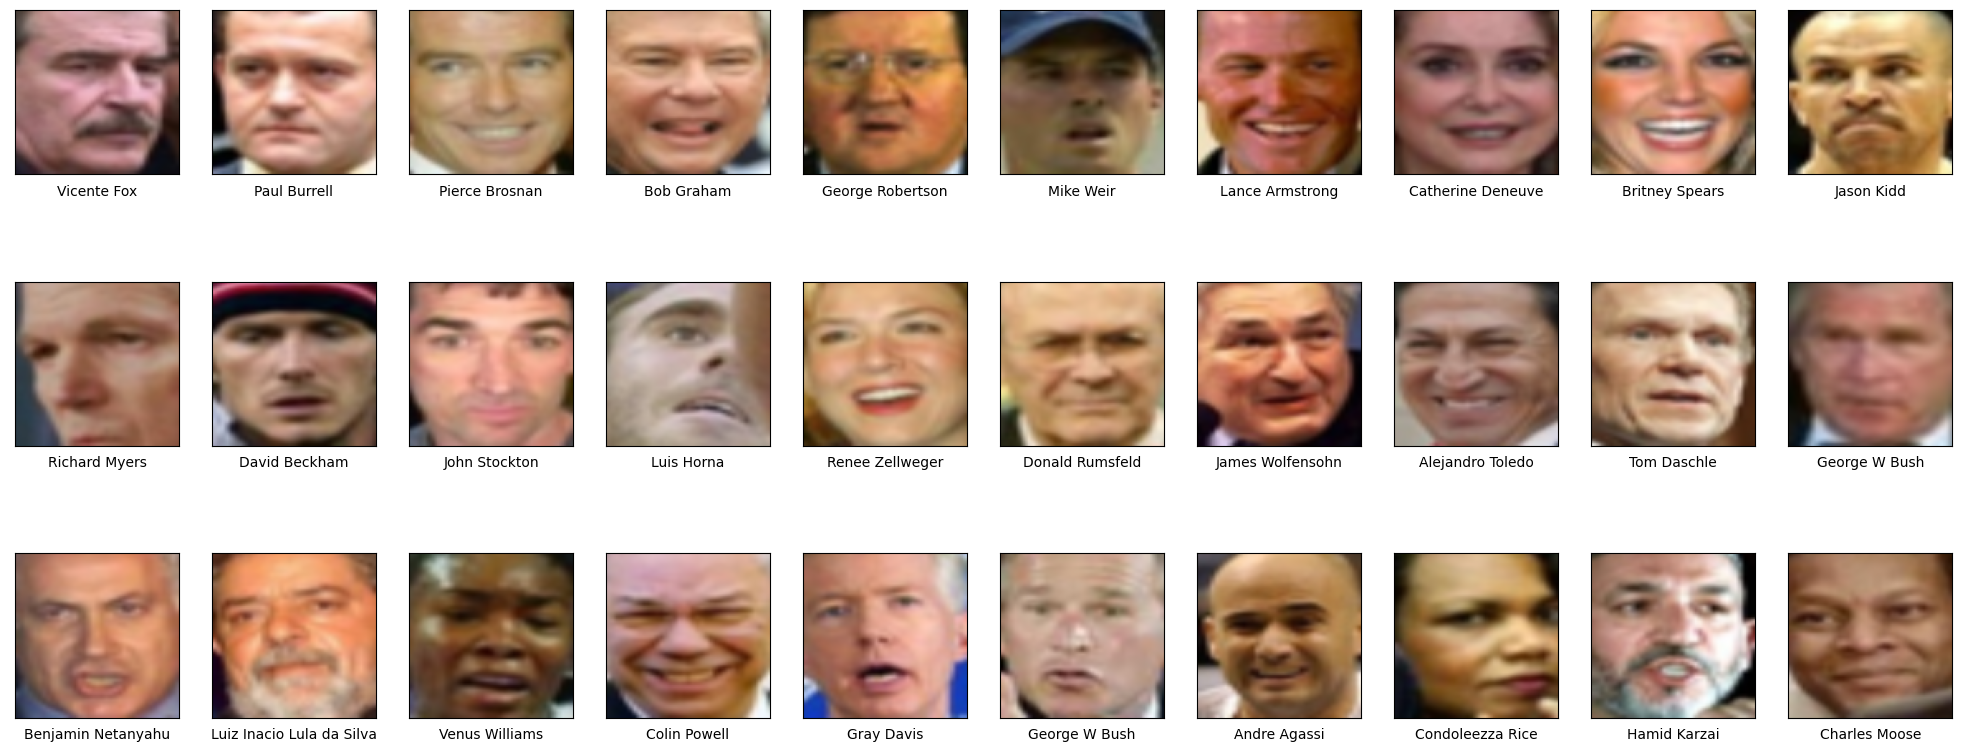

In [3]:
images = fetch_lfw_people(min_faces_per_person=5, resize=0.4,color=True, data_home='/home/siddharth/vscode/other_projects/vigilant-detection/datafiles')

# resize the images to 64x64
images.images = np.array([cv2.resize(image, (100, 100)) for image in images.images])

# show all the classes
print(images.target_names)


# plot 50 random images from the dataset
fig, ax = plt.subplots(3, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(images.images[i])
    fig.set_size_inches(25, 10)
    axi.set(xticks=[], yticks=[],
            xlabel=images.target_names[images.target[i]])
